## Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from pathlib import Path

## Load dataset

In [2]:
path = Path().cwd()
data_file = path.parent / "Week_7" / "Data" / "Ex3Data.csv"

T = pd.read_csv(data_file, header=None)

n, p = T.shape
X = np.array(T.loc[:, T.columns != 2])
y = np.array(T.loc[:, T.columns == 2]).T.reshape(n,1)

## Helper functions

In [3]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

### 3 Apply and interpret Support Vector Machines (SVM):

> a) Given the data in Ex3Data.csv, pick the kernel type as well as values of $\lambda$ and $\sigma$,
which gave the best visual results. Explain your decision.

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.679 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.630 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.593 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.704 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.815 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.889 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.704 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.778 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=pol

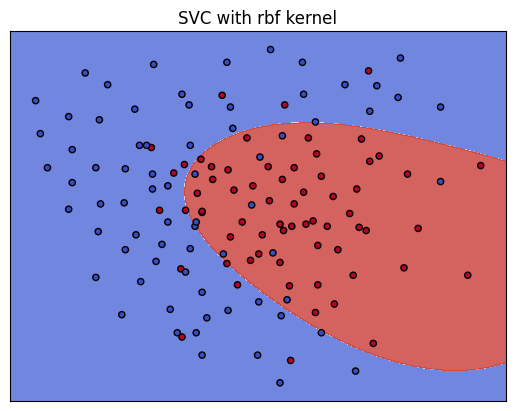

In [4]:
#Try to experiment with different parameters values. What can we adjust and what effect does the parameters serve

# Set up parameter grid
# C is the regularization parameter (inverse of lambda)
# gamma is the kernel coefficient for 'rbf' and 'poly' (equivalent to sigma)
param_grid = {
    'C': [0.1, 1, 5, 10],  # Different values of regularization
    'degree': [2, 3, 4],  # Degree of the polynomial kernel
    'gamma': ['scale', 'auto'],  # Different values of gamma/sigma
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernel types
}

# Create and fit GridSearchCV
clf = GridSearchCV(
    SVC(), 
    param_grid=param_grid, 
    cv=KFold(n_splits=5, shuffle=True),
    verbose=3
)
clf.fit(X, y.ravel())

# Get best parameters and model
best_params = clf.best_params_
kernelType = clf.best_estimator_.kernel

# Print results
print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {clf.best_score_:.4f}")

# title for the plots
title = 'SVC with %s kernel' % kernelType
        
# Set-up 2x2 grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

ax = plt.subplot(111)
plot_contours(ax, clf.fit(X,y.ravel()), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y.T.tolist()[0], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()